In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Visualisasi Distribusi Fitur:


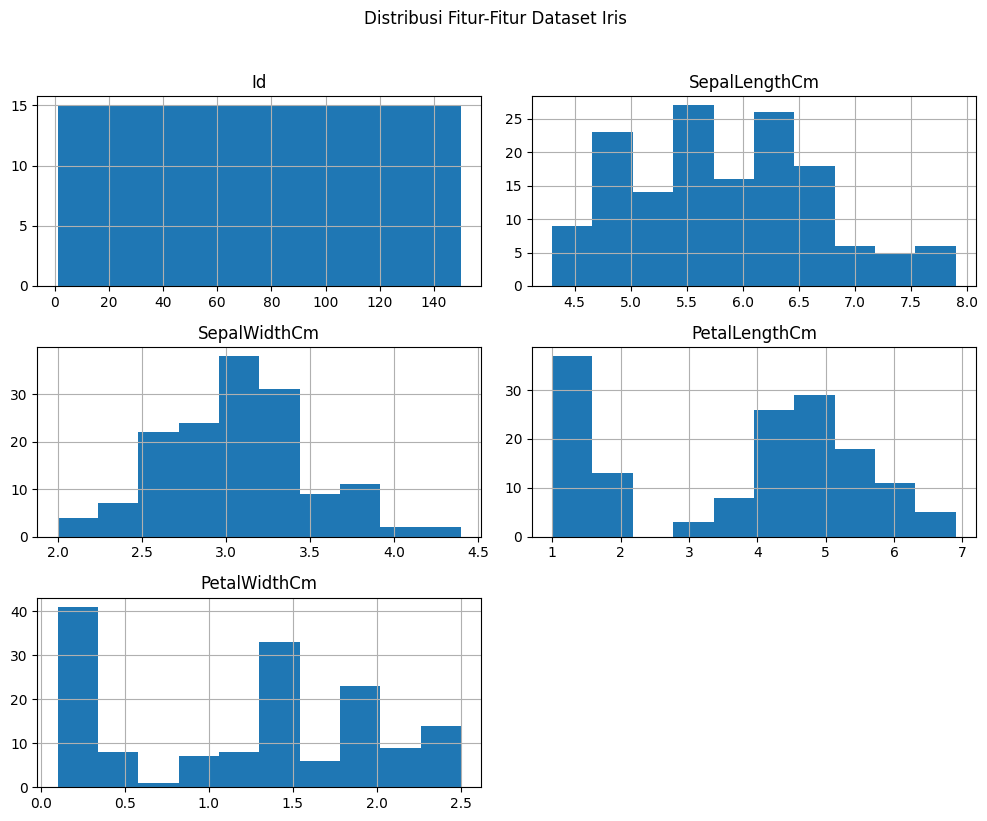

In [31]:
print("\nVisualisasi Distribusi Fitur:")
data.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur-Fitur Dataset Iris', y=1.02)
plt.tight_layout()
plt.show()


Visualisasi Hubungan Antar Fitur dan Perbedaan Kelas:


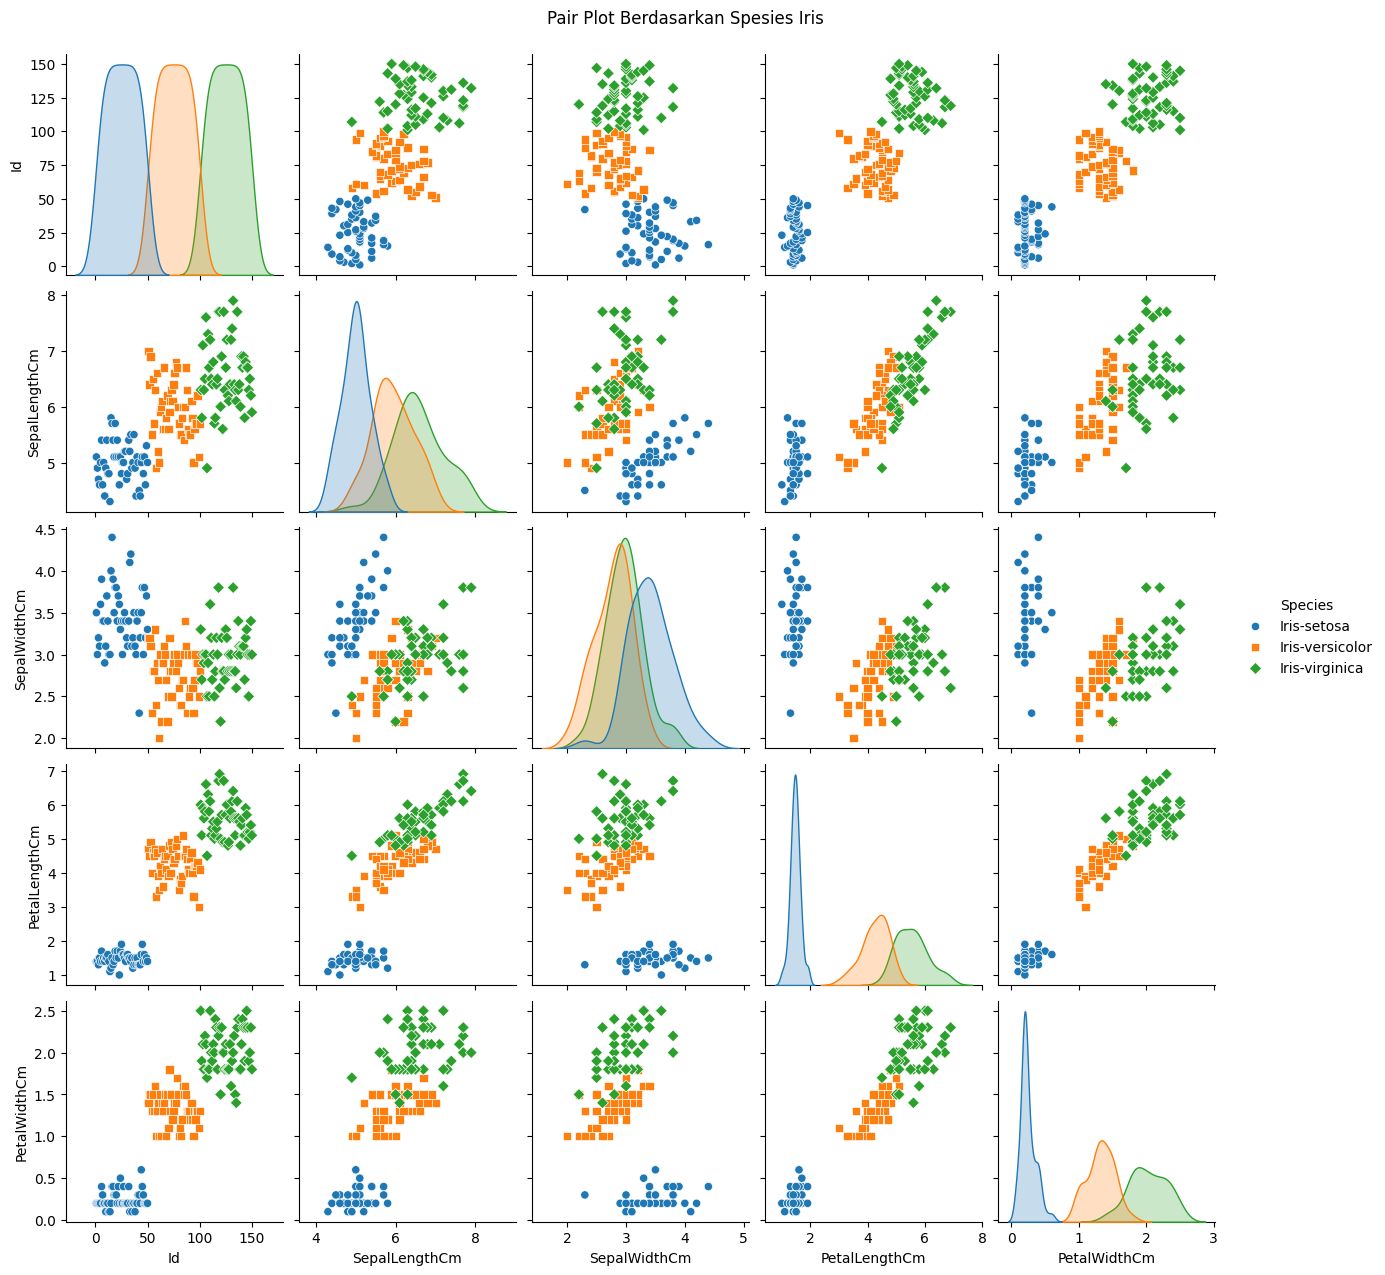

In [32]:

print("\nVisualisasi Hubungan Antar Fitur dan Perbedaan Kelas:")
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot Berdasarkan Spesies Iris', y=1.02)
plt.show()

In [33]:
data.drop('Id', axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
X = data.drop('Species', axis=1)
y = data['Species']

In [37]:
data = data.drop('Id', axis=1)

X = data.drop('Species', axis=1)
y = data['Species']

print("\nBentuk Fitur (X):", X.shape)
print("Bentuk Target (y):", y.shape)


Bentuk Fitur (X): (150, 4)
Bentuk Target (y): (150,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
print("\nJumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])


Jumlah Data Training: 120
Jumlah Data Testing: 30


In [40]:
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
y_pred = model.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [43]:
df_test = pd.DataFrame(X_test)
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

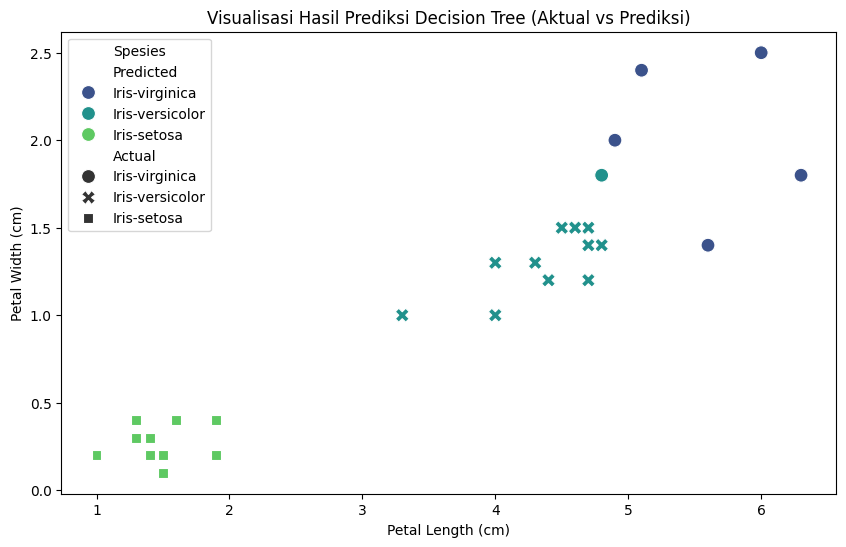

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Predicted', style='Actual', data=df_test, palette='viridis', s=100)
plt.title('Visualisasi Hasil Prediksi Decision Tree (Aktual vs Prediksi)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Spesies')
plt.show()

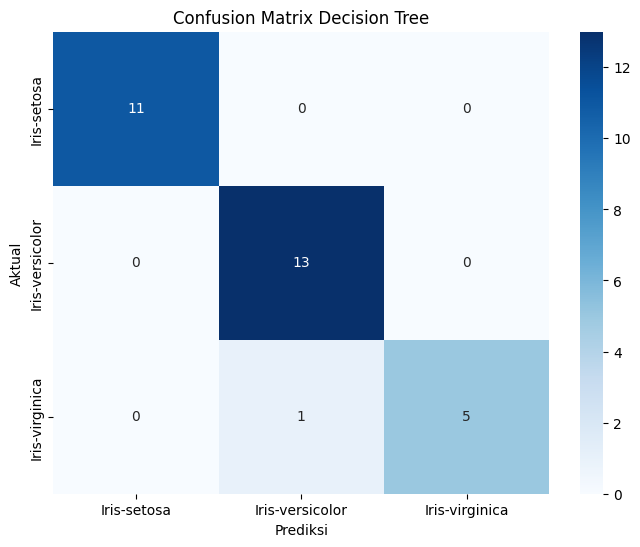

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [46]:
# Metrik Akurasi
print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred):.2f}")

# Laporan Klasifikasi (Classification Report)
# ringkasan metrik evaluasi (Precision, Recall, F1-Score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 0.97

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [47]:
data_baru = {
    'SepalLengthCm': [5.1],
    'SepalWidthCm': [3.5],
    'PetalLengthCm': [1.4],
    'PetalWidthCm': [0.2]
}

#Konversi dictionary menjadi DataFrame
data_baru_df = pd.DataFrame(data_baru)

print("Data Baru:")
print(data_baru_df)

Data Baru:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2


In [48]:
prediksi_baru = model.predict(data_baru_df)

print("\nPrediksi Spesies untuk Data Baru:")
print(prediksi_baru)


Prediksi Spesies untuk Data Baru:
['Iris-setosa']


In [49]:
jumlah_sampel = 10
jumlah_fitur = 4 # SepalLength, SepalWidth, PetalLength, PetalWidth

data_baru_acak = np.random.rand(jumlah_sampel, jumlah_fitur) * 10
# Kita kalikan 10 agar nilainya lebih realistis untuk dataset Iris

# Ubah ke DataFrame untuk memudahkan
kolom = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_baru_df = pd.DataFrame(data_baru_acak, columns=kolom)

# Tampilkan 5 baris pertama data baru
print("Data Baru (10 sampel acak):")
print(data_baru_df.head())

# Lakukan prediksi
prediksi_baru = model.predict(data_baru_df)

print("\nPrediksi Spesies untuk 10 Sampel Acak:")
print(prediksi_baru)

Data Baru (10 sampel acak):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       1.480356      2.989670       0.870215      5.097453
1       9.813060      9.534942       0.471655      3.112094
2       5.543087      4.393496       8.844075      1.098197
3       7.694753      5.125594       1.566906      3.579686
4       0.828264      8.090161       0.321614      8.632392

Prediksi Spesies untuk 10 Sampel Acak:
['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor']


In [50]:
prediction = model.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [51]:
# Lakukan prediksi pada data training
y_train_pred = model.predict(X_train)

# Hitung akurasi pada data training
akurasi_train = accuracy_score(y_train, y_train_pred)
print(f"Akurasi Model pada Data Training: {akurasi_train:.2f}")

# Akurasi pada data testing (sudah dihitung sebelumnya)
akurasi_test = accuracy_score(y_test, y_pred) # y_pred adalah hasil prediksi pada X_test
print(f"Akurasi Model pada Data Testing: {akurasi_test:.2f}")

# Bandingkan kedua akurasi
if akurasi_train > akurasi_test + 0.05: # Ambil selisih 5% sebagai indikasi awal
    print("\nIndikasi OVERFITTING: Akurasi training jauh lebih tinggi dari akurasi testing.")
elif akurasi_train < 0.7 and akurasi_test < 0.7: # Contoh batas bawah, bisa disesuaikan
    print("\nIndikasi UNDERFITTING: Akurasi training dan testing sama-sama rendah.")
else:
    print("\nModel memiliki performa yang konsisten pada data training dan testing (good fit).")

Akurasi Model pada Data Training: 0.97
Akurasi Model pada Data Testing: 0.97

Model memiliki performa yang konsisten pada data training dan testing (good fit).


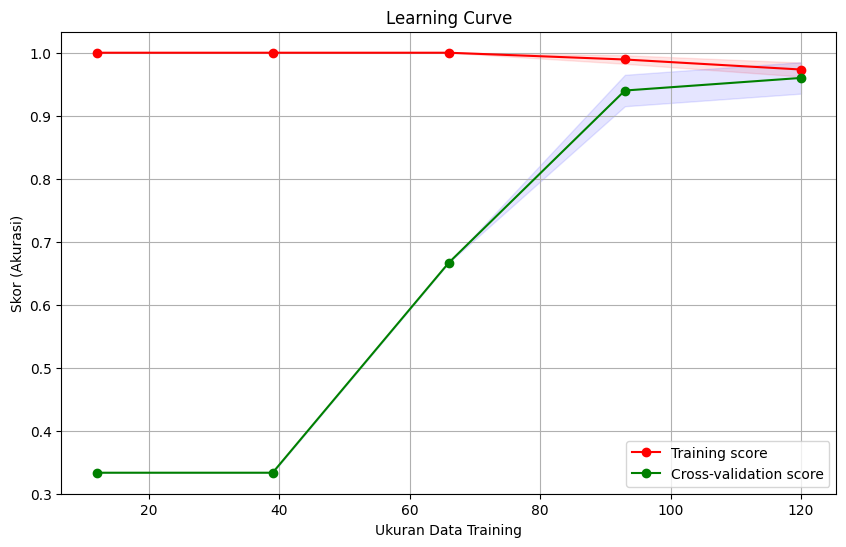

In [52]:
from sklearn.model_selection import learning_curve

# Buat learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# Hitung rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="b")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel("Ukuran Data Training")
plt.ylabel("Skor (Akurasi)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score

# Lakukan validasi silang dengan 5 lipatan (cv=5)
scores = cross_val_score(model, X, y, cv=5)

print(f"\nSkor Validasi Silang: {scores}")
print(f"Akurasi Rata-rata: {scores.mean():.2f}")


Skor Validasi Silang: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Akurasi Rata-rata: 0.96


In [54]:
print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 0.97

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

